In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

X_train = X_train/255
X_train = X_train[...,None]
X_test = X_test/255
X_test = X_test[...,None]
ten_classes_eye = np.eye(10)
Y_train = ten_classes_eye[Y_train]
Y_test = ten_classes_eye[Y_test]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [3]:
network = Sequential()
network.add(Convolution2D(32,(4,4),(1,1),input_shape=(28,28,1),activation=tf.nn.relu))
network.add(MaxPool2D((5,5),(1,1)))
network.add(Convolution2D(64,(4,4),(1,1),activation=tf.nn.relu))
network.add(MaxPool2D((4,4),(1,1)))
network.add(Flatten())
network.add(Dense(1024,activation=tf.nn.relu))
network.add(Dense(10))
network.compile(
    loss=tf.losses.softmax_cross_entropy,
    optimizer=Adam(),
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
#train
network.fit(X_train,Y_train,64,8)

Epoch 1/8
60000/60000 [==============================] - 21s 343us/sample - loss: 0.1374 - acc: 0.9589 
Epoch 2/8
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0486 - acc: 0.9850
Epoch 3/8
60000/60000 [==============================] - 19s 324us/sample - loss: 0.0349 - acc: 0.9889
Epoch 4/8
60000/60000 [==============================] - 19s 323us/sample - loss: 0.0299 - acc: 0.9906
Epoch 5/8
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0248 - acc: 0.9922 - loss: 
Epoch 6/8
60000/60000 [==============================] - 19s 320us/sample - loss: 0.0206 - acc: 0.9933
Epoch 7/8
60000/60000 [==============================] - 19s 324us/sample - loss: 0.0188 - acc: 0.9937
Epoch 8/8
60000/60000 [==============================] - 19s 321us/sample - loss: 0.0158 - acc: 0.9948


In [5]:
print(network.layers[0].output.shape)  #25,25,32
print(network.layers[1].output.shape)  #21,21,32
print(network.layers[2].output.shape)  #18,18,64
print(network.layers[3].output.shape)  #15,15,64
print(network.layers[4].output.shape)  #15*15*32=14400

(?, 25, 25, 32)
(?, 21, 21, 32)
(?, 18, 18, 64)
(?, 15, 15, 64)
(?, 14400)


In [6]:
def image_compose(datas,rows,cols,weight,height):
    rows_data=[]    
    for y in range(0, rows):
        one_rows_data = []
        for x in range(0, cols):
            image_data = datas[y*cols+x]
            data_w = image_data.shape[1]
            data_h = image_data.shape[0]
            if data_w != weight or data_h !=height:
                new_data = np.zeros((height,weight))
                new_data[0:data_h,0:data_w] = image_data
                image_data = new_data
            one_rows_data.append(image_data)
        rows_data.append(np.concatenate(one_rows_data,axis=1))
    data = np.concatenate(rows_data,axis=0)
    return data

In [7]:
loss,accuracy = network.evaluate(X_test,Y_test)
print("loss = ",loss)
print("accuracy = ",accuracy)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.0373 - acc: 0.9897
loss =  0.03729475717765672
accuracy =  0.9897


Accuracy =  0.99


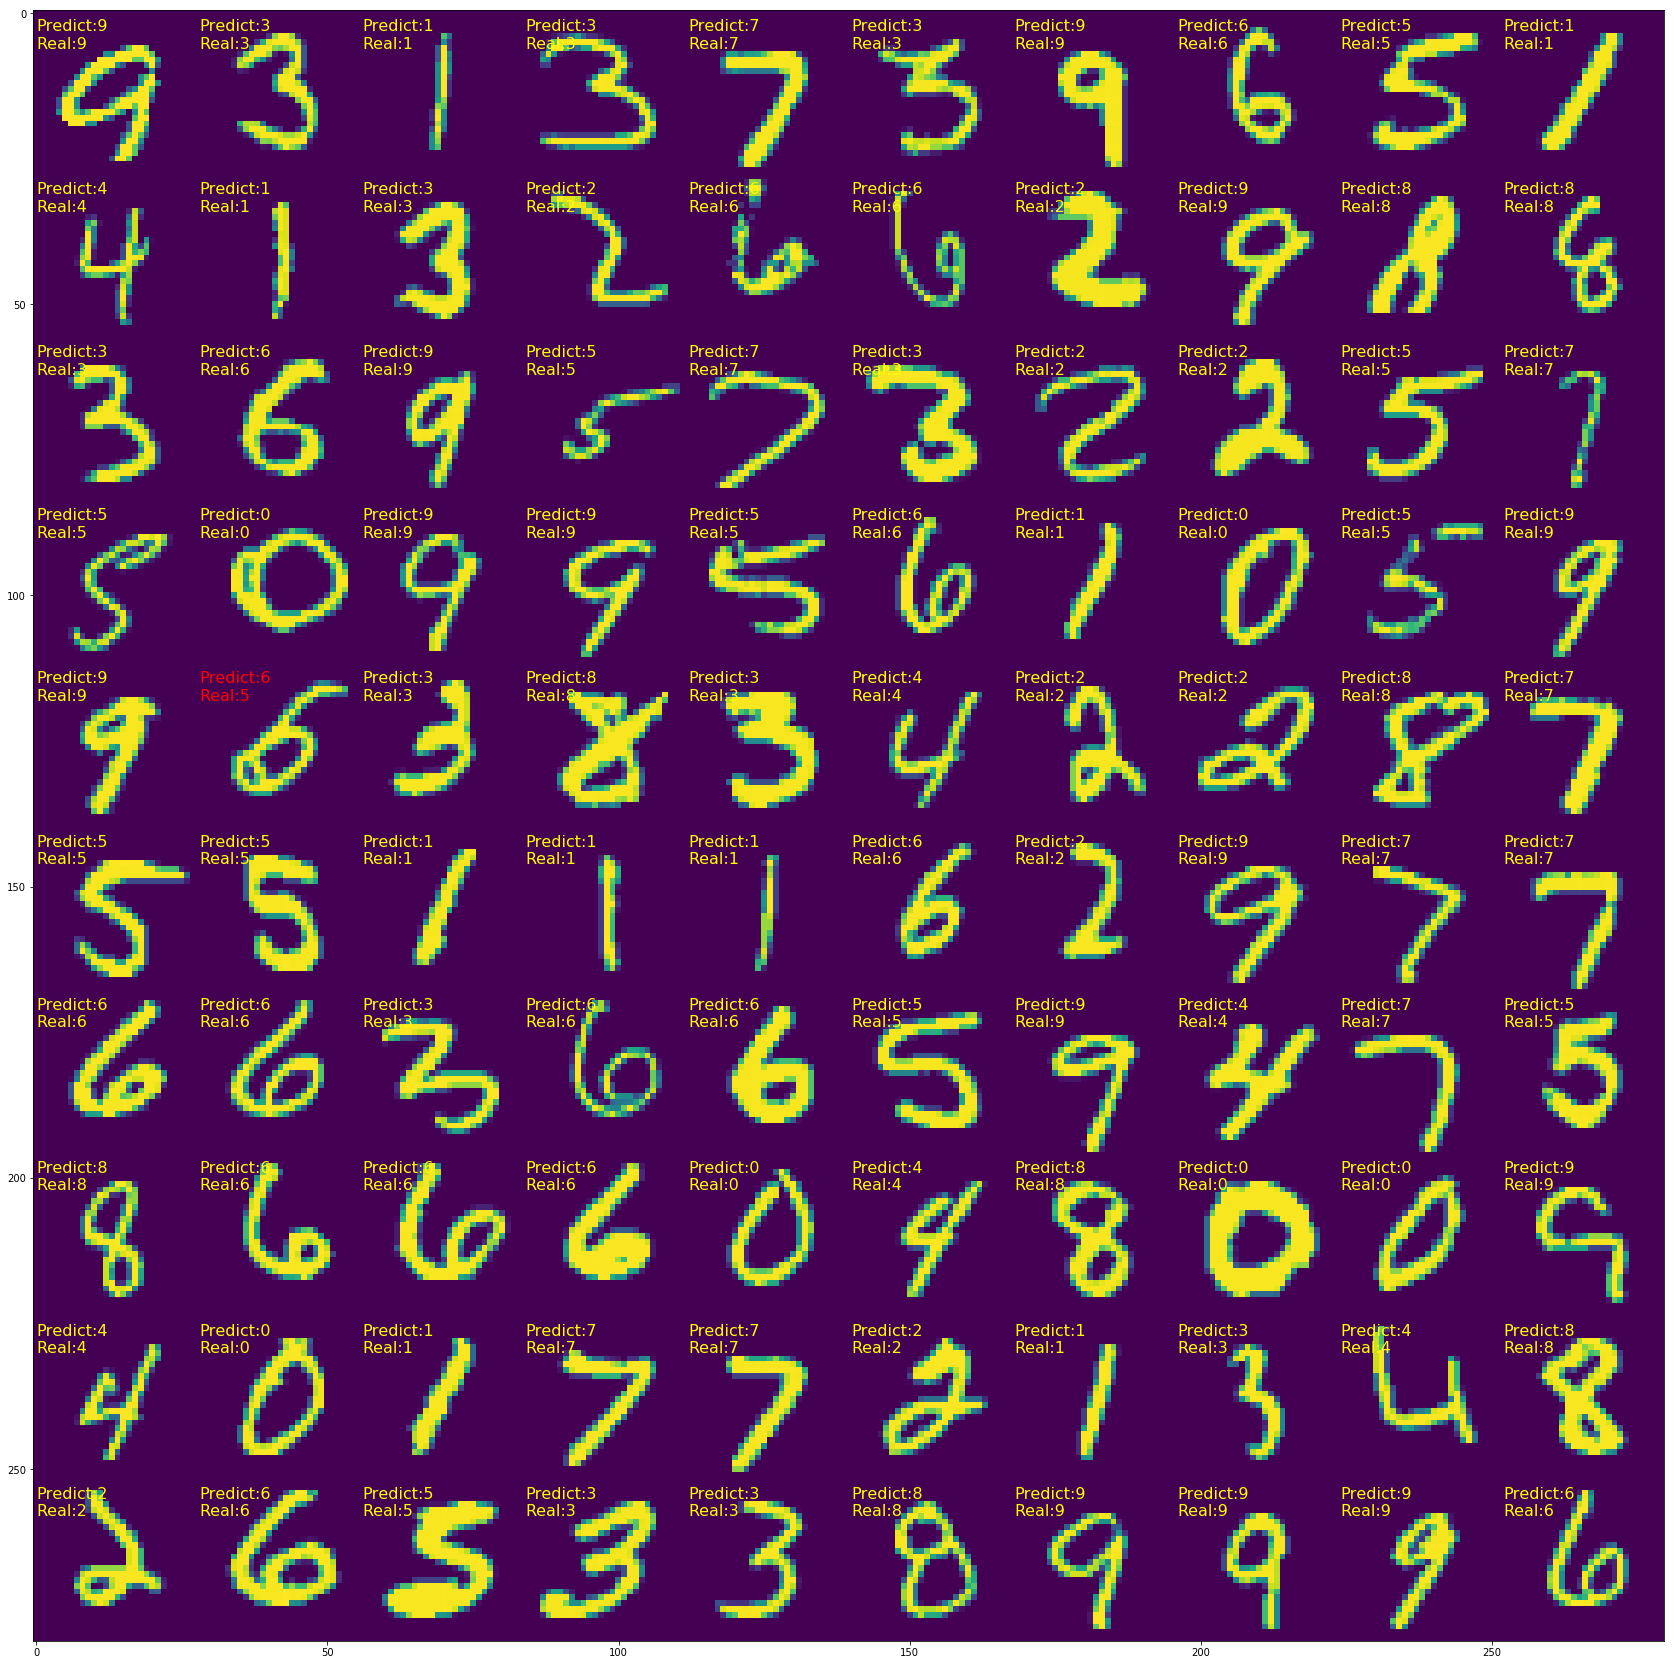

In [8]:
SAMPLE_NUM = 100
ROW_NUM = 10
COL_NUM = int(SAMPLE_NUM/ROW_NUM)
CELL_WIDTH = 28
CELL_HEIGHT = 28

test_lens = X_test.shape[0]
nsd = np.random.RandomState(2019)
index_samples = nsd.choice(test_lens,SAMPLE_NUM,replace=False)
X_sample = X_test[index_samples]
X_sample_image = X_sample.reshape((-1,CELL_WIDTH,CELL_HEIGHT))
Y_sample = Y_test[index_samples]

images = image_compose(X_sample_image,ROW_NUM,COL_NUM,CELL_WIDTH,CELL_HEIGHT)
plt.figure(figsize=(30,30))
plt.imshow(images)

Y_sample_predict = network.predict(X_sample)
sample_predicts = np.argmax(Y_sample_predict,axis=1)
sample_labels = np.argmax(Y_sample,axis=1)

result_v = sample_predicts == sample_labels
accuracy = np.count_nonzero(result_v)/ len(result_v)
print("Accuracy = ",accuracy)

for row in range(ROW_NUM):
    for col in range(COL_NUM):
        index = row * COL_NUM +col
        pre = sample_predicts[index]
        label = sample_labels[index]
        label_color = "yellow" if result_v[row*COL_NUM+col] else "red"
        plt.text(col*CELL_WIDTH,row*CELL_HEIGHT+6,"Predict:{}\nReal:{}".format(pre,label),color=label_color,fontsize=16)
plt.show()